<a href="https://colab.research.google.com/github/arbong007/CNN/blob/master/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/arbong007/arbong.git

Cloning into 'CNN'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 188 (delta 0), reused 0 (delta 0), pack-reused 185
Receiving objects: 100% (188/188), 16.54 MiB | 7.28 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
# Direktori dataset citra
import os
data_dir = 'CNN/'

# Pendefinisian direktori data latih/training set
train_sakit = os.path.join(data_dir + 'tr/sakit/')
train_healthy = os.path.join(data_dir + 'tr/healthy/')
print (train_sakit)


# Pendefinisian direktori data validasi/validation set
val_sakit = os.path.join(data_dir + 'val/sakit/')
val_healthy = os.path.join(data_dir + 'val/healthy/')
print (val_sakit)

CNN/tr/sakit/
CNN/val/sakit/


# Parameter

In [ ]:
nb_train_samples = len(os.listdir(train_sakit)) + len(os.listdir(train_healthy))
nb_val_samples = len(os.listdir(val_sakit)) + len(os.listdir(val_healthy))
epochs = 100
batch_size = 32
shape = 200

print(nb_train_samples, nb_val_samples)

55 45


In [ ]:
# List nama file citra sakit
train_sakit_names = os.listdir(data_dir + 'tr/sakit/') 
print(train_sakit_names[:10])

# List nama file citra healthy
train_healthy_names = os.listdir(data_dir + 'tr/healthy/')
print(train_healthy_names[:10])

['train-cbsd-0.jpg', 'train-cbsd-3.jpg', 'train-cmd-9.jpg', 'train-cgm-5.jpg', 'train-cbb-5.jpg', 'train-cbsd-4.jpg', 'train-cbb-3.jpg', 'train-cbsd-1.jpg', 'train-cmd-4.jpg', 'train-cbsd-9.jpg']
['train-healthy-7.jpg', 'train-healthy-1.jpg', 'train-healthy-6.jpg', 'train-healthy-9.jpg', 'train-healthy-0.jpg', 'train-healthy-10.jpg', 'train-healthy-8.jpg', 'train-healthy-3.jpg', 'train-healthy-2.jpg', 'train-healthy-4.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameter untuk grafik; citra akan ditampilkan dalam 4x4
nrows = 4
ncols = 4

# Index untuk iterasi citra
pic_index = 0

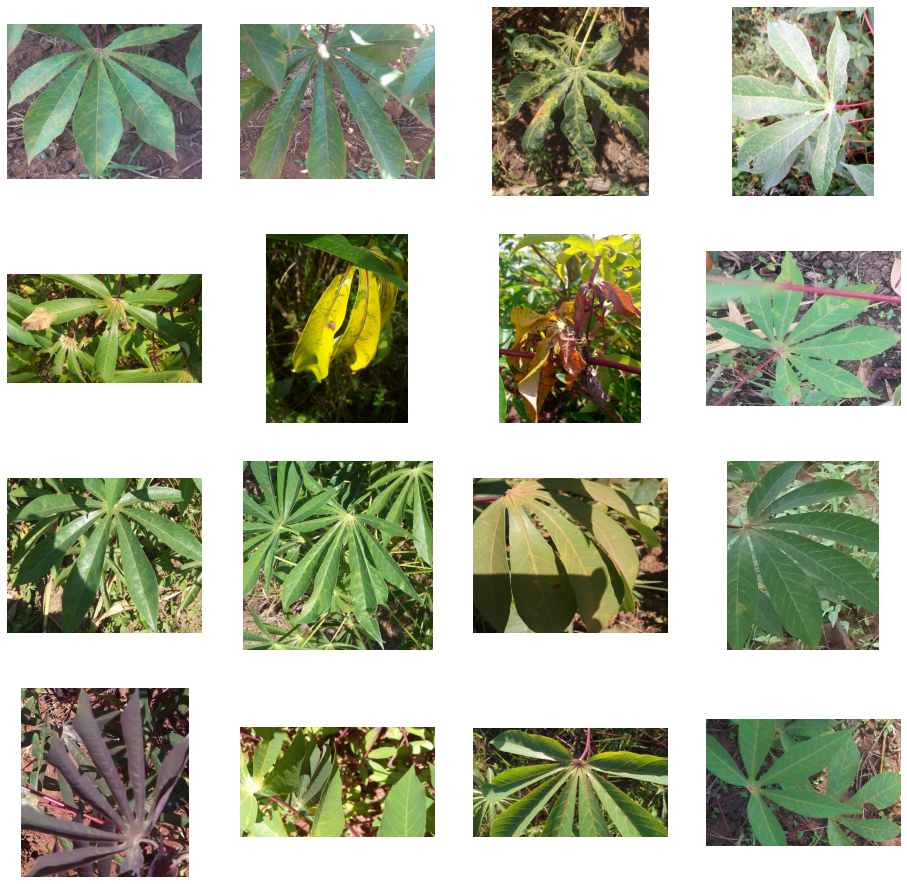

In [ ]:
# Mengatur fig matplotlib dan mengatur ukuran agar sesuai dengan citra 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sakit_pix = [os.path.join(train_sakit, fname) 
                for fname in train_sakit_names[pic_index-8:pic_index]]
next_healthy_pix = [os.path.join(train_healthy, fname) 
                for fname in train_healthy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sakit_pix+next_healthy_pix):
  # Set up subplot; indeks subplot mulai dari 1
  # Mengatur subplot; 
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Machine learning model

In [ ]:
import tensorflow as tf

# Callbacks

In [ ]:
# Callback agar model CNN berhenti menjalankan proses training saat mencapai nilai akurasi 99%
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nAkurasi telah mencapai 99% membatalkan proses training")
      self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
checkpoint_filepath = data_dir + '/test/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [ ]:
callbacks = tf.keras.callbacks.TensorBoard(log_dir='./grafik')

# Alexnet

In [ ]:
# Alexnet
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', 
                           input_shape=(shape, shape, 3), ),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(384, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(384, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 96)        34944     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 19, 19, 256)       614656    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 384)         885120    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 256)        

# VGG-16

In [ ]:
# VGG-16
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', 
                           input_shape=(200, 200, 3), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu' , padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 256)      

# VGG-19

In [ ]:
# VGG-19
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', 
                           input_shape=(shape, shape, 3), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu' , padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 256)      

# My network

In [ ]:
# My network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(shape, shape, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0

# My network no DO

In [ ]:
# My network no DO
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(shape, shape, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [ ]:
# My network2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', 
                           input_shape=(shape, shape, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)       

In [ ]:
# My network3
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', 
                           input_shape=(shape, shape, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

# Etc

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255, # normaslisasi citra
    rotation_range=30, # augmentasi
) 
train_generator = train_datagen.flow_from_directory(
    data_dir+'tr/',
    target_size=(shape, shape), # resize citra
    batch_size=batch_size,
    class_mode='binary'    
)

validation_datagen = ImageDataGenerator(
    rescale=1./255, # normaslisasi citra
) 
validation_generator = validation_datagen.flow_from_directory(
    data_dir+'val/',
    target_size=(shape, shape), # resize citra
    batch_size=batch_size,
    class_mode='binary'
)

Found 55 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
from time import time

start = time()

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=nb_val_samples // batch_size, 
    callbacks=[model_checkpoint_callback, callbacks]
)

print(time()-start)

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 0.6655 - acc: 0.7188 - val_loss: 0.6211 - val_acc: 0.6875
Epoch 2/10
1/1 [==============================] - 12s 12s/step - loss: 0.5172 - acc: 0.8125 - val_loss: 0.6302 - val_acc: 0.6875
Epoch 3/10
1/1 [==============================] - 12s 12s/step - loss: 0.4938 - acc: 0.8125 - val_loss: 0.5248 - val_acc: 0.7812
Epoch 4/10
1/1 [==============================] - 12s 12s/step - loss: 0.4066 - acc: 0.8696 - val_loss: 0.5517 - val_acc: 0.7812
Epoch 5/10
1/1 [==============================] - 12s 12s/step - loss: 0.3859 - acc: 0.8696 - val_loss: 0.6792 - val_acc: 0.7188
Epoch 6/10
1/1 [==============================] - 12s 12s/step - loss: 0.6784 - acc: 0.7188 - val_loss: 0.5437 - val_acc: 0.7812
Epoch 7/10
1/1 [==============================] - 12s 12s/step - loss: 0.5070 - acc: 0.8261 - val_loss: 0.6987 - val_acc: 0.6250
Epoch 8/10
1/1 [==============================] - 12s 12s/step - loss: 0.6221 - acc: 0.6957 - val

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
tensorboard --logdir grafik/

Reusing TensorBoard on port 6006 (pid 582), started 2:29:18 ago. (Use '!kill 582' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount("/content/drive")
data_tes = '/content/drive/My Drive/Colab Notebooks/RESET/'

model.save_weights(data_tes + 'duakelas/mynetwork_epochs50.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.load_weights(data_tes + 'duakelas/mynetwork_epochs50.h5')

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
test_data_dir = data_tes + 'duakelas/ts/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale Testing Data
test_datagen = ImageDataGenerator(
    rescale=1. / 255, 
)

In [ ]:
generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(shape, shape),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

Found 37 images belonging to 1 classes.


In [ ]:
predict = model.predict(generator)

In [ ]:
import pandas as pd

In [ ]:
sakit = []
healthy = []

for list_acc in predict:
  for acc in list_acc:
    if acc > 0.8:
      sakit.append(0)
      healthy.append(1)
    else:
      sakit.append(1)
      healthy.append(0)

In [ ]:
testing = pd.DataFrame({'file':os.listdir(test_data_dir + 'tes'), 'sakit':sakit, 'healthy':healthy})

In [ ]:
testing

file  sakit  healthy
0    train-healthy-8.jpg      0        1
1    train-healthy-7.jpg      0        1
2    train-healthy-9.jpg      0        1
3   train-healthy-10.jpg      0        1
4    train-healthy-6.jpg      0        1
5    train-healthy-5.jpg      0        1
6    train-healthy-4.jpg      0        1
7    train-healthy-0.jpg      0        1
8       train-cbsd-5.jpg      0        1
9       train-cbsd-3.jpg      0        1
10      train-cbsd-1.jpg      0        1
11      train-cbsd-4.jpg      0        1
12      train-cbsd-2.jpg      0        1
13      train-cbsd-0.jpg      0        1
14      train-cbb-10.jpg      0        1
15       train-cbb-9.jpg      0        1
16       train-cbb-7.jpg      0        1
17       train-cbb-8.jpg      0        1
18       train-cmd-3.jpg      0        1
19       train-cbb-6.jpg      0        1
20       train-cmd-2.jpg      0        1
21      train-cgm-10.jpg      0        1
22       train-cmd-4.jpg      0        1
23       train-cmd-1.jpg      0        1
24       train-cmd-0.jpg      0        1
25       train-cgm-9.jpg      0        1
26       train-cgm-6.jpg      0        1
27       train-cgm-7.jpg      0        1
28       train-cgm-1.jpg      0        1
29       train-cgm-5.jpg      0        1
30       train-cgm-0.jpg      0        1
31       train-cgm-8.jpg      0        1
32      train-cbsd-9.jpg      0        1
33      train-cbsd-8.jpg      0        1
34     train-cbsd-10.jpg      0        1
35      train-cbsd-7.jpg      0        1
36      train-cbsd-6.jpg      0        1

# Confusion Matrix

In [ ]:
# Confusion matrix param

TP = healthy[21:].count(1) + 1 
FP = healthy[20:].count(0) + 1 
TN = sakit[:21].count(1) + 1
FN = sakit[:20].count(0) + 1

In [ ]:
recall = TP/(TP+FN)
spesificity = TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)

print(recall, spesificity, acc, precision)

0.4473684210526316 0.5 0.45 0.9444444444444444


In [ ]:
import re
test_dir = test_data_dir + 'tes'
y_actual = []

for filename in os.listdir(test_dir):
  if re.search('sakit', filename):
    y_actual.append(0)
  else:
    y_actual.append(1)

In [ ]:
y_predict = []

for list_acc in predict:
  for acc in list_acc:
    if acc > 0.5:
      y_predict.append(1)
    else:
      y_predict.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actual, y_predict) 

array([[37]])

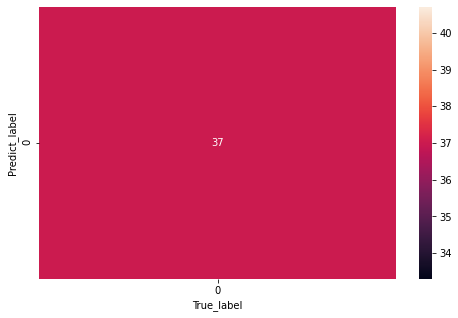

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_actual, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True_label")
plt.ylabel("Predict_label")
plt.savefig(data_tes + 'duakelas/mynetwork.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_actual, y_predict))

report = classification_report(y_actual, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



precision  recall  f1-score  support
1                   1.0     1.0       1.0     37.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     37.0
weighted avg        1.0     1.0       1.0     37.0

In [ ]:
df.to_csv(data_tes + 'duakelas/mynetwork.csv')

# Plot grafik training

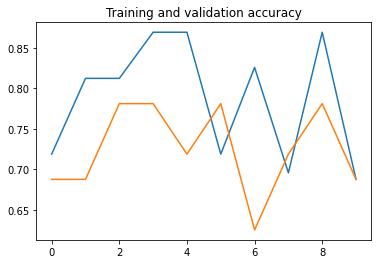

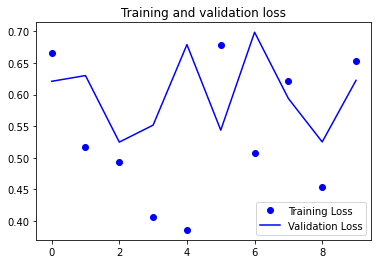

In [ ]:

# menampilkan grafik training dan validasi akurasi dan loss training dan validasi berdasarkan setiap epoch
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

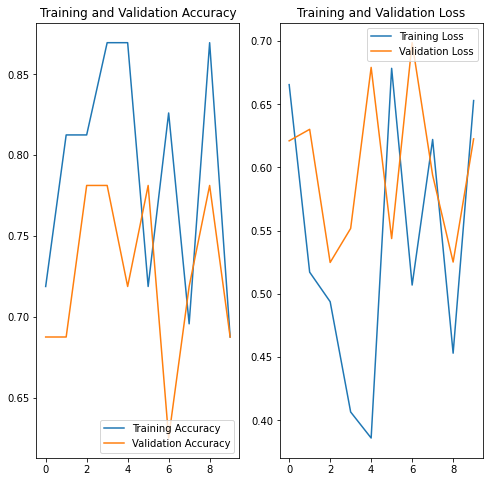

In [ ]:
# menampilkan grafik training dan validasi akurasi dan loss training dan validasi beradsarkan setiap epoch
# grafik garis
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()